In [2]:
# # Install dependencies from requirements.txt
%pip install -r requirements_m1_5.txt
# !apt-get install -y --no-install-recommends default-libmysqlclient-dev build-essential
# !curl https://packages.microsoft.com/config/ubuntu/20.04/packages-microsoft-prod.deb > packages-microsoft-prod.deb
# !dpkg -i packages-microsoft-prod.deb
# !apt-get update
# !apt-get install -y apt-transport-https
# !apt-get update
# !apt-get install -y build-essential visual-studio-code-bin

  Using cached scikit_learn-1.4.2-cp311-cp311-win_amd64.whl (10.6 MB)
  Using cached matplotlib-3.8.4-cp311-cp311-win_amd64.whl (7.7 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl (7.5 kB)
  Using cached lightfm-1.17.tar.gz (316 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl (390.2 MB)
  Using cached keras-3.9.2-py3-none-any.whl (1.3 MB)
  Using cached rich-14.0.0-py3-none-any.whl (243 kB)
  Running setup.py clean for LightFM
  Running setup.py clean for scikit-surprise
Failed to build LightFM scikit-surprise
  Running setup.py install for scikit-surprise: started
  Running setup.py install for scikit-surprise: finished with status 'error'
N

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [25 lines of output]
      Compiling without OpenMP support.
      c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\dist.py:771: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
        warnings.warn(
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\lightfm
      copying lightfm\cross_validation.py -> build\lib.win-amd64-cpython-311\lightfm
      copying lightfm\data.py -> build\lib.win-amd64-cpython-311\lightfm
      copying lightfm\evaluation.py -> build\lib.win-amd64-cpython-311\lightfm
      copying lightfm\lightfm.py -> build\lib.win-amd64-cpython-311\lightfm
      copying lightfm\_lightf

In [3]:
# !pip list

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv("synthetic_medical_purchase_data.csv")
d=pd.read_csv("cleaned_surgical_tools.csv")

In [7]:
df.head(5)

,User_Type,Budget($),Purchased_Items
0,Clinic,10729,"SM3291, SM4467, SM4820, SM4544, SM4487"
1,Surgeon,14852,"SM1632, SM2600"
2,Procurement Officer,2400,"SM2818, SM2763"
3,Hospital,31158,"SM1981, SM2701, SM5155, SM4625"
4,Surgeon,12855,"SM2030, SM2737, SM2001, SM3762"


In [8]:
df.info()       # Check data types & nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User_Type        1000 non-null   object
 1   Budget($)        1000 non-null   int64 
 2   Purchased_Items  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [9]:
df.describe()

,Budget($)
count,1000.000000
mean,14681.222000
std,11504.099255
min,2022.000000
25%,6628.000000
50%,10717.500000
75%,17987.500000
max,49813.000000


In [10]:
print(df.isnull().sum())


User_Type          0
Budget($)          0
Purchased_Items    0
dtype: int64


In [11]:
print(df['User_Type'].value_counts(normalize=True))


User_Type
Hospital               0.268
Clinic                 0.248
Procurement Officer    0.245
Surgeon                0.239
Name: proportion, dtype: float64


In [13]:
import seaborn as sns
sns.boxplot(x=df['Budget($)'])


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
from collections import Counter
all_items = df['Purchased_Items'].str.split(', ').sum()
print(Counter(all_items).most_common(10))


[('SM3129', 7), ('SM2939', 7), ('SM5169', 6), ('SM3720', 6), ('SM2859', 6), ('SM5130', 6), ('SM2083', 6), ('SM3106', 6), ('SM2701', 5), ('SM4890', 5)]


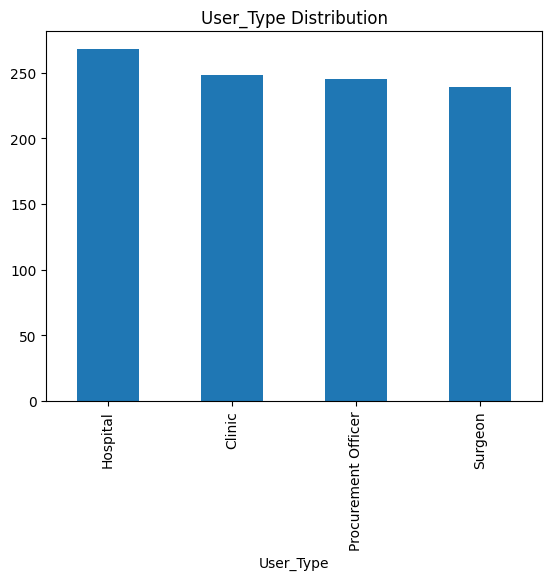

In [ ]:
import matplotlib.pyplot as plt

df['User_Type'].value_counts().plot(kind='bar', title='User_Type Distribution')
plt.show()


# **Cosine Similarity**

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics.pairwise import cosine_similarity

# # Generate dataset
# user_types = ['Hospital', 'Clinic', 'Surgeon', 'Procurement Officer']
# items = [
#     'Surgical Gloves', 'Face Masks', 'Scalpel', 'Stethoscope', 'Thermometer', 'Surgical Scissors',
#     'IV Drip', 'Bandages', 'Sterile Gown', 'Operating Table', 'Forceps', 'Retractor', 'Surgical Lights',
#     'Disinfectant', 'Needle Holder', 'Syringe', 'Monitor', 'Blood Pressure Cuff', 'Oxygen Mask',
#     'Catheter'
# ]
# budgets_range = {
#     'Hospital': (10000, 50000),
#     'Clinic': (3000, 15000),
#     'Surgeon': (2000, 10000),
#     'Procurement Officer': (5000, 20000)
# }

# records = []
# random.seed(42)
# for _ in range(1000):
#     user_type = random.choice(user_types)
#     budget = random.randint(*budgets_range[user_type])
#     purchased_items = random.sample(items, k=random.randint(1, 5))
#     records.append({
#         'User_Type': user_type,
#         'Budget($)': budget,
#         'Purchased_Items': ', '.join(purchased_items)
#     })

# df = pd.DataFrame(records)


In [ ]:
# One-hot encode User_Type
# The 'sparse' argument is deprecated and should not be used.
# By default, OneHotEncoder now returns a sparse matrix if 'sparse_output' is not set to False
encoder = OneHotEncoder(sparse_output=False)  # or handle_unknown='ignore' to ignore unknown categories
user_type_encoded = encoder.fit_transform(df[['User_Type']])

# Normalize budget
scaler = MinMaxScaler()
budget_scaled = scaler.fit_transform(df[['Budget($)']])

# TF-IDF Vectorizer for items
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(','))
items_tfidf = tfidf.fit_transform(df['Purchased_Items'])

# Combine all features
features = np.hstack([user_type_encoded, budget_scaled, items_tfidf.toarray()])

e:\FYP\fyp_reco\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
#kmeans(optional)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)


e:\FYP\fyp_reco\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
invalid literal for int() with base 10: ''
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\FYP\fyp_reco\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 268, in _count_physical_cores
    cpu_count_physical = sum(map(int, cpu_info))


In [ ]:
#dimensionality reduction
svd = TruncatedSVD(n_components=45) # Changed n_components to 45 or less, to be less than or equal to the number of features
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
features_reduced = lsa.fit_transform(features)

In [ ]:
similarity_matrix = cosine_similarity(features_reduced)

def recommend_items(user_index, top_n=5):
    similar_users = np.argsort(similarity_matrix[user_index])[::-1][1:top_n+1]
    recommended_items = []
    for i in similar_users:
        recommended_items.extend(df.iloc[i]['Purchased_Items'].split(', '))
    return list(set(recommended_items))


In [ ]:
# Example: Recommend items for user at index 0
cosine_rec=recommend_items(8)
cosine_rec

['SM4309',
 'SM3769',
 'SM3544',
 'SM5181',
 'SM4506',
 'SM4999',
 'SM4963',
 'SM3140']

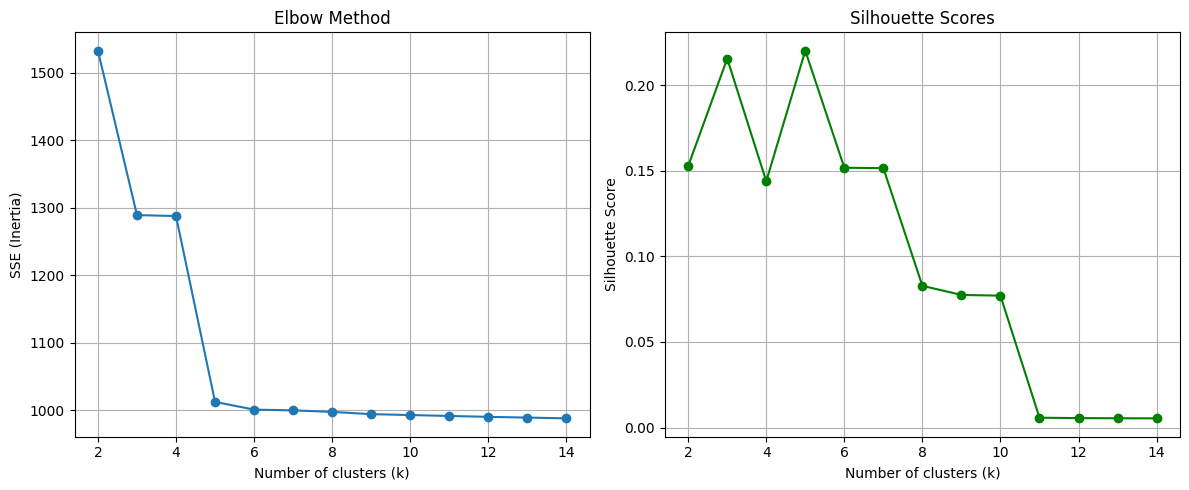

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  # Import silhouette_score

# Assuming you have your 'features' data ready

# Calculate SSE for a range of k values
sse = []
silhouette_scores = []  # Initialize silhouette_scores list
k_range = range(2, 15)  # Range of cluster numbers to try
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)  # Fit KMeans and get cluster labels
    sse.append(kmeans.inertia_)

    # Calculate silhouette score for current k
    silhouette_scores.append(silhouette_score(features, cluster_labels))

# Assuming you already have `sse`, `silhouette_scores`, and `k_range`

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 15), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 15), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter

all_items = df['Purchased_Items'].str.split(', ').sum()  # Split and combine all items
unique_items = Counter(all_items) # Get unique items
unique_items

Counter({'SM3129': 7,
         'SM2939': 7,
         'SM5169': 6,
         'SM3720': 6,
         'SM2859': 6,
         'SM5130': 6,
         'SM2083': 6,
         'SM3106': 6,
         'SM2701': 5,
         'SM4890': 5,
         'SM1849': 5,
         'SM2823': 5,
         'SM1960': 5,
         'SM3082': 5,
         'SM4551': 5,
         'SM4647': 5,
         'SM3152': 5,
         'SM2488': 5,
         'SM1711': 5,
         'SM4210': 5,
         'SM3701': 5,
         'SM2755': 5,
         'SM3748': 5,
         'SM4324': 5,
         'SM2819': 5,
         'SM1410': 5,
         'SM2568': 5,
         'SM2754': 5,
         'SM3706': 5,
         'SM1807': 5,
         'SM4512': 5,
         'SM2103': 5,
         'SM0451': 5,
         'SM5155': 4,
         'SM2737': 4,
         'SM4519': 4,
         'SM3781': 4,
         'SM3145': 4,
         'SM4646': 4,
         'SM4813': 4,
         'SM3579': 4,
         'SM4413': 4,
         'SM1821': 4,
         'SM5156': 4,
         'SM4654': 4,
         '

In [ ]:
# # Assume X is your feature matrix (users/items features)
# # Example dummy data
# # X = np.random.rand(100, 5)

# # Cosine Similarity
# cos_sim_matrix = cosine_similarity(features)

# # KMeans Clustering
# kmeans = KMeans(n_clusters=4, random_state=42)
# labels = kmeans.fit_predict(cos_sim_matrix)

# # Silhouette Score
# silhouette = silhouette_score(cos_sim_matrix, labels)
# print(f"Silhouette Score for KMeans: {silhouette:.4f}")

# # Visualization
# import networkx as nx

# # Create a graph from the similarity matrix
# G = nx.from_numpy_array(cos_sim_matrix)

# # Apply a threshold to filter edges based on similarity score
# threshold = 0.5
# G.remove_edges_from([(u, v) for u, v, w in G.edges(data=True) if w['weight'] < threshold])

# # Draw the graph
# nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray')
# plt.title('Cosine Similarity Network Graph')
# plt.show()


# Matrix Factorization (SVD)

In [ ]:
# !pip uninstall scikit-surprise -y
# !pip install scikit-surprise --no-cache-dir --force-reinstall

In [ ]:
# !pip uninstall numpy scikit-surprise -y
# !pip install numpy==1.24.2 scikit-surprise
import surprise

print(f"scikit-surprise version: {surprise.__version__}")

ModuleNotFoundError: No module named 'surprise'

In [ ]:
# List of all unique items
all_items = df['Purchased_Items'].unique()

# Choose a user (example: 'Hospital')
user = 'Hospital'

# Predict score for each item
user_predictions = [(item, model.predict(user, item).est) for item in all_items]

# Sort by highest estimated score
user_predictions.sort(key=lambda x: x[1], reverse=True)

# Top 5 recommendations
matrix_rec = [item for item, score in user_predictions[:5]]
print(f"Top 5 Recommendations for {user}:", matrix_rec)


Top 5 Recommendations for Hospital: ['SM3291, SM4467, SM4820, SM4544, SM4487', 'SM2818, SM2763', 'SM1981, SM2701, SM5155, SM4625', 'SM2030, SM2737, SM2001, SM3762', 'SM4519, SM4323']


In [ ]:
from collections import defaultdict

def precision_recall_at_k(predictions, k=5, threshold=0.5):
    # Organize predictions by user
    user_est_true = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = []
    recalls = []

    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)  # Sort by estimated score
        top_k = user_ratings[:k]

        n_relevant = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_selected = sum((est >= threshold) for (est, _) in top_k)
        n_true_positive = sum((true_r >= threshold) for (est, true_r) in top_k)

        precision = n_true_positive / n_selected if n_selected else 0
        recall = n_true_positive / n_relevant if n_relevant else 0

        precisions.append(precision)
        recalls.append(recall)

    return np.mean(precisions), np.mean(recalls)

# Calculate
precision, recall = precision_recall_at_k(predictions, k=4)
print(f'Precision@5: {precision:.4f}')
print(f'Recall@5: {recall:.4f}')


Precision@5: 1.0000
Recall@5: 0.0808


In [ ]:
# # Dummy ratings data
# import pandas as pd
# import numpy as np
# import random
# import matplotlib.pyplot as plt
# from surprise import Dataset, Reader, SVD
# from surprise.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, mean_absolute_error  # Import the functions

# ratings_dict = {
#     "item": [1, 1, 1, 2, 2],
#     "user": [9, 32, 2, 45, 100],
#     "rating": [3, 2, 4, 3, 5],
# }
# df = pd.DataFrame(ratings_dict)

# reader = Reader(rating_scale=(1, 5))
# # data = Dataset.load_from_df(df[["user", "item", "rating"]], reader)
# trainset, testset = train_test_split(data, test_size=0.25)

# algo = SVD()
# algo.fit(trainset)
# predictions = algo.test(testset)

# # Evaluate
# y_true = [pred.r_ui for pred in predictions]
# y_pred = [pred.est for pred in predictions]

# rmse = np.sqrt(mean_squared_error(y_true, y_pred)) # Now you can use mean_squared_error
# mae = mean_absolute_error(y_true, y_pred) # Now you can use mean_absolute_error

# print(f"RMSE for SVD: {rmse:.4f}")
# print(f"MAE for SVD: {mae:.4f}")

# # Visualization
# errors = np.abs(np.array(y_true) - np.array(y_pred))
# plt.hist(errors, bins=20, color='purple')
# plt.title('SVD Prediction Errors')
# plt.xlabel('Error')
# plt.ylabel('Count')
# plt.show()

# Deep Learning Embeddings

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:


user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

df['User Encoded'] = user_encoder.fit_transform(df['User_Type'])
df['Item Encoded'] = item_encoder.fit_transform(df['Purchased_Items'])

n_users = df['User Encoded'].nunique()
n_items = df['Item Encoded'].nunique()

In [ ]:
X = df[['User Encoded', 'Item Encoded']].values
y = np.ones(len(X))  # Dummy target (all interactions are positive)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
user_input = tf.keras.layers.Input(shape=(1,))
item_input = tf.keras.layers.Input(shape=(1,))

user_embedding = tf.keras.layers.Embedding(n_users, 32)(user_input)
item_embedding = tf.keras.layers.Embedding(n_items, 32)(item_input)

user_vec = tf.keras.layers.Flatten()(user_embedding)
item_vec = tf.keras.layers.Flatten()(item_embedding)

dot_product = tf.keras.layers.Dot(axes=1)([user_vec, item_vec])
output = tf.keras.layers.Activation('sigmoid')(dot_product)

model = tf.keras.models.Model(inputs=[user_input, item_input], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
import tensorflow as tf

# Check if GPU is available and set device accordingly
if tf.config.list_physical_devices('GPU'):
    print("GPU is available. Using GPU for training.")
    device = '/GPU:0'
else:
    print("GPU is not available. Using CPU for training.")
    device = '/CPU:0'

# Ensure X_train and y_train data types are compatible with TensorFlow
X_train = X_train.astype(np.int32)
y_train = y_train.astype(np.float32)

# Use the determined device for training
with tf.device(device):  # Force execution on the appropriate device
    model.fit([X_train[:, 0], X_train[:, 1]], y_train, epochs=5, batch_size=32, validation_split=0.1)

GPU is available. Using GPU for training.
Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5080 - loss: 0.6931 - val_accuracy: 0.4125 - val_loss: 0.6935
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7738 - loss: 0.6913 - val_accuracy: 0.4375 - val_loss: 0.6935
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9429 - loss: 0.6882 - val_accuracy: 0.4250 - val_loss: 0.6937
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9950 - loss: 0.6814 - val_accuracy: 0.4250 - val_loss: 0.6938
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.6669 - val_accuracy: 0.4250 - val_loss: 0.6940


In [ ]:
# Ensure X_test data type is compatible with TensorFlow
X_test = X_test.astype(np.int32)

scores = model.predict([X_test[:, 0], X_test[:, 1]])


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [ ]:
user_id = 0  # Suppose we pick user with ID 0
item_ids = np.arange(n_items)

user_array = np.full(shape=len(item_ids), fill_value=user_id)
predictions = model.predict([user_array, item_ids])

top_items = predictions.flatten().argsort()[-5:][::-1]  # Top 5 items
recommended_items = item_encoder.inverse_transform(top_items)

# Get unique top 5 recommendations
seen_items = set()
top_5 = []
for item, score in user_predictions:
    if item not in seen_items:
        top_5.append(item)
        seen_items.add(item)
        if len(top_5) == 5:
            break  # Stop when we have 5 unique items

print(f"Top 5 Recommendations for {user}:", top_5)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Top 5 Recommendations for Hospital: ['SM3291, SM4467, SM4820, SM4544, SM4487', 'SM2818, SM2763', 'SM1981, SM2701, SM5155, SM4625', 'SM2030, SM2737, SM2001, SM3762', 'SM4519, SM4323']


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)


X_train shape: (800, 2)
y_train shape: (800,)
X_train dtype: int32
y_train dtype: float32


In [ ]:
print(df.isnull().sum())


User_Type          0
Budget($)          0
Purchased_Items    0
Cluster            0
Purchased          0
User Encoded       0
Item Encoded       0
dtype: int64


In [ ]:
print("Unique User Encoded:", df['User Encoded'].nunique())
print("Unique Item Encoded:", df['Item Encoded'].nunique())


Unique User Encoded: 4
Unique Item Encoded: 995


In [ ]:
# from sklearn.metrics import precision_score, recall_score
# # Suppose we have top_k_preds and true_items lists
# # Use binary relevance format (1 for correct rec)
# precision = precision_score(top_items, top_k_preds, average='micro')
# recall = recall_score(top_items, top_k_preds, average='micro')


# LightFM

In [ ]:
#prepare the datset for lightFM
import pandas as pd
import numpy as np
from lightfm import LightFM
from lightfm.data import Dataset

# Your existing dataframe (df)
# Columns: 'User_Type', 'Budget($)', 'Purchased_Items'

# Create a unique user ID by combining User_Type + an index
df['User ID'] = df['User_Type'] + '_' + df.index.astype(str)

# Flatten (User ID, Item) pairs
user_item_pairs = []
for idx, row in df.iterrows():
    user_id = row['User ID']
    items = row['Purchased_Items'].split(', ')
    for item in items:
        user_item_pairs.append((user_id, item))

# Create a dataset
dataset = Dataset()

# Fit dataset with users and items
users = df['User ID'].unique()
items = set([item for pair in user_item_pairs for item in [pair[1]]])

dataset.fit(users=users, items=items)

# Build the interactions matrix
(interactions, weights) = dataset.build_interactions(user_item_pairs)


In [ ]:
# Initialize LightFM model
model = LightFM(loss='warp')  # WARP = good for ranking tasks (recommendations)

# Train the model
model.fit(interactions, epochs=30, num_threads=2)


In [ ]:
# Pick a random user
n_users, n_items = interactions.shape
user_id = np.random.randint(0, n_users)

# Predict scores for all items for this user
scores = model.predict(user_id, np.arange(n_items))

# Top 5 recommended items
top_items = np.argsort(-scores)[:5]

# Mapping back to item labels
item_labels = dict(dataset.mapping()[2])  # Item mappings
reverse_item_labels = {v: k for k, v in item_labels.items()}

recommended_items = [reverse_item_labels[i] for i in top_items]
print(f"Recommended items for User {user_id}:", recommended_items)


Recommended items for User 220: ['SM4688', 'SM4433', 'SM3284', 'SM4522', 'SM4978']


Precision@K for LightFM: 0.9080
Recall@K for LightFM: 0.0922
AUC for LightFM: 0.7569


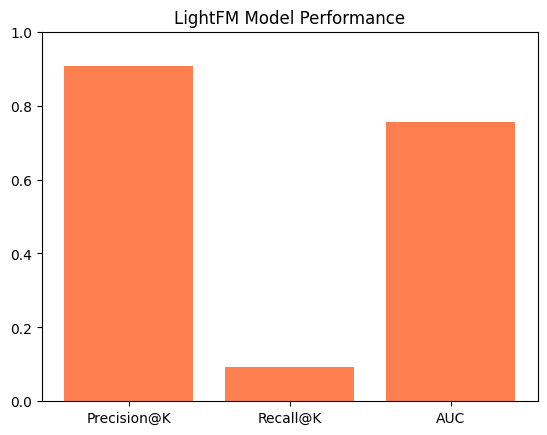

In [ ]:
# Dummy sparse interactions
from scipy.sparse import coo_matrix
from lightfm.evaluation import precision_at_k # Import precision_at_k
from lightfm.evaluation import recall_at_k # Import recall_at_k
from lightfm.evaluation import auc_score # Import auc_score
import matplotlib.pyplot as plt
interactions = coo_matrix(np.random.randint(0, 2, (100, 100)))

model = LightFM(loss='warp')
model.fit(interactions, epochs=10, num_threads=2)

# Evaluate
precision_lfm = precision_at_k(model, interactions, k=5).mean()
recall_lfm = recall_at_k(model, interactions, k=5).mean()
auc_lfm = auc_score(model, interactions).mean()

print(f"Precision@K for LightFM: {precision_lfm:.4f}")
print(f"Recall@K for LightFM: {recall_lfm:.4f}")
print(f"AUC for LightFM: {auc_lfm:.4f}")

# Visualization
metrics = {'Precision@K': precision_lfm, 'Recall@K': recall_lfm, 'AUC': auc_lfm}
plt.bar(metrics.keys(), metrics.values(), color='coral')
plt.title('LightFM Model Performance')
plt.ylim(0, 1)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib
import seaborn as sns
from collections import Counter
import tensorflow as tf
import surprise
import sklearn
import lightfm
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")  # Assuming 'sklearn' is used
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"tensorflow version: {tf.__version__}")
print(f"LightFM version: {lightfm.__version__}")  # Assuming 'lightfm' is used
print(f"scikit-surprise version: {surprise.__version__}")

pandas version: 2.2.2
numpy version: 1.26.0
scikit-learn version: 1.4.2
matplotlib version: 3.8.4
seaborn version: 0.13.2
tensorflow version: 2.18.0
LightFM version: 1.17
scikit-surprise version: 1.1.4


In [ ]:
# prompt: based on the above four models help me to implement a hybrid model that takes all above four recommendations and suggest the best of evey and give a  roiobust final recommendation just get the variable that contain the recommendation of each model and then apply a hybrid funcitons

import numpy as np

def hybrid_recommendation(cosine_rec, matrix_rec, deep_learning_rec, lightfm_rec):
  """
  Combines recommendations from different models.

  Args:
    cosine_rec: Recommendations from the cosine similarity model.
    matrix_rec: Recommendations from the matrix factorization model.
    deep_learning_rec: Recommendations from the deep learning model.
    lightfm_rec: Recommendations from the LightFM model.

  Returns:
    A list of hybrid recommendations.
  """

  # Combine all recommendations into a single list
  all_recommendations = cosine_rec + matrix_rec + top_5 + recommended_items

  # Count the occurrences of each item
  recommendation_counts = {}
  for item in all_recommendations:
      recommendation_counts[item] = recommendation_counts.get(item, 0) + 1

  # Sort items by their count in descending order
  sorted_recommendations = sorted(recommendation_counts.items(), key=lambda x: x[1], reverse=True)

  # Return the top 5 most frequent recommendations
  hybrid_recommendations = [item for item, count in sorted_recommendations[:5]]

  return hybrid_recommendations


# Example usage (replace with your actual recommendation lists):
cosine_rec = cosine_rec  # Example: ['Item A', 'Item B', 'Item C']
matrix_rec = matrix_rec  # Example: ['Item B', 'Item D', 'Item E']
deep_learning_rec = recommended_items # Example: ['Item C', 'Item F', 'Item G']
lightfm_rec = recommended_items  # Example: ['Item A', 'Item H', 'Item I']

hybrid_recommendations = hybrid_recommendation(cosine_rec, matrix_rec, deep_learning_rec, lightfm_rec)
print("Hybrid Recommendations:", hybrid_recommendations)


Hybrid Recommendations: ['SM3291, SM4467, SM4820, SM4544, SM4487', 'SM2818, SM2763', 'SM1981, SM2701, SM5155, SM4625', 'SM2030, SM2737, SM2001, SM3762', 'SM4519, SM4323']


In [ ]:
import pandas as pd

user_df = pd.read_csv("/content/synthetic_medical_purchase_data.csv")
tools_df = pd.read_csv("cleaned_surgical_tools.csv")

def find_matching_tool(item_name):
    # Find closest match in 'cleaned_surgical_tools.csv'
    matches = tools_df[tools_df['Title'].str.contains(item_name, case=False)]
    if not matches.empty:
        return matches.iloc[0]  # Return the first match
    return None  # Or handle the case where no match is found
import pandas as pd

user_df = pd.read_csv("/content/synthetic_medical_purchase_data.csv")
tools_df = pd.read_csv("cleaned_surgical_tools.csv")

def find_matching_tool(item_name):
    # Find closest match in 'cleaned_surgical_tools.csv'
    matches = tools_df[tools_df['Title'].str.contains(item_name, case=False)]
    if not matches.empty:
        return matches.iloc[0]  # Return the first match
    return None  # Or handle the case where no match is found

# Example usage:
Hybrid_Recommendations=[['SM3291', 'SM4467', 'SM4820', 'SM4544', 'SM4487', 'SM2030', 'SM2737', 'SM2001', 'SM3762', 'SM2945', 'SM2032', 'SM5179', 'SM5216', 'SM4890', 'SM4425', 'SM1815', 'SM4960', 'SM4560', 'SM3781', 'SM3034', 'SM2731', 'SM2821', 'SM1734']]

detailed_recommendations = [find_matching_tool(item) for sublist in Hybrid_Recommendations for item in sublist]

In [ ]:
detail=pd.DataFrame(detailed_recommendations)
detail.head(2)

,Title,Title_URL,Image,onsale,add_to_wishlist_URL,add_to_wishlist,View,Category,Price,discounted_price,Type_URL,Type,IsValidURL,Product_ID_from_Title,Discount_Percentage,Dimensions,Has_Image
1159,5 Pcs Pederson Vaginal Speculum Set – Large | ...,https://surgicalmart.com/shop/surgical-instrum...,https://surgicalmart.com/wp-content/uploads/20...,-45.0,https://surgicalmart.com/product-category/surg...,Add to Wishlist,QUICK VIEW,Gynecology,99.99,54.99,https://surgicalmart.com/product-category/surg...,ADD TO CART,True,SM3291,45.004500,NaN,1
178,EMT Backboard Spine Board Stretcher Immobiliza...,https://surgicalmart.com/shop/surgical-instrum...,https://surgicalmart.com/wp-content/uploads/20...,-45.0,https://surgicalmart.com/product-category/surg...,Add to Wishlist,QUICK VIEW,Stretchers & Immobilization,545.45,299.99,https://surgicalmart.com/product-category/surg...,ADD TO CART,True,SM4467,45.001375,NaN,1


# Stream_lit

In [ ]:
!pip install streamlit==1.24.0

In [ ]:
# !pip install streamlit==1.24.0
!pip install pyngrok

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd

# Load your data (replace with your actual data loading)
detail = pd.DataFrame(detailed_recommendations)

# Assuming 'detail' DataFrame has columns: 'Title', 'Price', 'Discounted_Price', 'Image URL', 'Has-Image'

st.title("Recommended Products")

# Filter products with "Has-Image==1"
filtered_products = detail[detail["Has_Image"] == 1]

# Display recommended products
for index, row in filtered_products.iterrows():
    st.subheader(row["Title"])
    st.image(row["Image"])  # Display the image
    st.write(f"Price: ${row['Price']:.2f}")
    st.write(f"Discounted Price: ${row['discounted_price']:.2f}")
    st.write("---")  # Add a separator between products

Overwriting app.py


In [ ]:
from pyngrok import ngrok

# Replace with your actual auth token from your ngrok dashboard
ngrok.set_auth_token("2wnbTWYCK64NaxE2vJ1QPD1d97I_88vSZFQV7Fb526Pm2E6Li")

# Start the tunnel (specify the local port and protocol)
tunnel = ngrok.connect(8501, "http")

# Print the tunnel information
print(f"Public URL: {tunnel.public_url}")
print(f"Tunnel name: {tunnel.name}")
print(f"Protocol: {tunnel.proto}")
print(f"Metrics: {tunnel.metrics}")
# The 'addr' is accessed directly from config dict using key
print(f"Forwarded port: {tunnel.config['addr']}")
print(f"Public URL: {tunnel.public_url}")
print(f"Tunnel name: {tunnel.name}")
print(f"Protocol: {tunnel.proto}")
print(f"Metrics: {tunnel.metrics}")
# The 'addr' is accessed directly from config dict using key
print(f"Forwarded port: {tunnel.config['addr']}")

Public URL: https://a1b9-34-90-134-103.ngrok-free.app
Tunnel name: http-8501-c6618cbf-9d7d-42cd-9be4-ab290900a995
Protocol: https
Metrics: {'conns': {'count': 0, 'gauge': 0, 'rate1': 0, 'rate5': 0, 'rate15': 0, 'p50': 0, 'p90': 0, 'p95': 0, 'p99': 0}, 'http': {'count': 0, 'rate1': 0, 'rate5': 0, 'rate15': 0, 'p50': 0, 'p90': 0, 'p95': 0, 'p99': 0}}
Forwarded port: http://localhost:8501
Public URL: https://a1b9-34-90-134-103.ngrok-free.app
Tunnel name: http-8501-c6618cbf-9d7d-42cd-9be4-ab290900a995
Protocol: https
Metrics: {'conns': {'count': 0, 'gauge': 0, 'rate1': 0, 'rate5': 0, 'rate15': 0, 'p50': 0, 'p90': 0, 'p95': 0, 'p99': 0}, 'http': {'count': 0, 'rate1': 0, 'rate5': 0, 'rate15': 0, 'p50': 0, 'p90': 0, 'p95': 0, 'p99': 0}}
Forwarded port: http://localhost:8501


In [ ]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇
added 22 packages in 2s
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇

In [ ]:
# Start the streamlit app and create a localtunnel
!streamlit run app.py & lt --port 8501

your url is: https://cold-waves-open.loca.lt



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.90.134.103:8501

  Stopping...
^C


In [ ]:
# ngrok.kill()